In [123]:
import numpy
import numpy as np
import pandas as pd
ads = pd.read_csv('ads.csv')
ads.head()

,cpm,hour_start,hour_end,publishers,audience_size,user_ids,ad_id
0,220.0,1058,1153,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1...",0
1,312.0,1295,1301,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3...",1
2,70.0,1229,1249,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5...",2
3,240.0,1295,1377,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524...",3
4,262.0,752,990,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2...",4


In [124]:
history = pd.read_csv('history.csv')
history.head()

,hour,cpm,publisher,user_id
0,10,30.00,1,15661
1,8,41.26,1,8444
2,7,360.00,1,15821
3,18,370.00,1,21530
4,8,195.00,2,22148


In [125]:
ads.tail()

,cpm,hour_start,hour_end,publishers,audience_size,user_ids,ad_id
1003,127.0,1095,1154,"2,7,12,15,16",368,"38,50,143,237,456,649,653,698,881,893,1100,127...",1003
1004,90.0,1052,1056,"2,21",484,"1,4,61,212,230,348,356,372,429,431,462,540,593...",1004
1005,122.0,1058,1063,"2,5",704,"1,23,29,104,136,176,201,206,250,269,355,403,44...",1005
1006,138.0,932,1169,"1,2,7",1210,"67,73,80,146,182,202,212,254,307,377,383,385,3...",1006
1007,35.0,747,806,"1,3,7,18",1000,"39,78,101,205,242,266,277,284,306,440,447,451,...",1007


In [126]:
target = pd.read_csv('target.csv')
target.head()

,ad_id,at_least_one
0,0,0.0430
1,1,0.0130
2,2,0.0878
3,3,0.2295
4,4,0.3963


In [127]:
users = pd.read_csv('users.csv')
users.head()

,user_id,sex,age,city_id
0,0,2,19,0
1,1,1,0,1
2,2,2,24,2
3,3,1,20,3
4,4,2,29,4


In [128]:
users = users.replace(0, numpy.NaN)
users.head()

,user_id,sex,age,city_id
0,NaN,2.0,19.0,NaN
1,1.0,1.0,NaN,1.0
2,2.0,2.0,24.0,2.0
3,3.0,1.0,20.0,3.0
4,4.0,2.0,29.0,4.0


In [129]:
users.isnull().sum(axis=0)

user_id       1
sex          30
age        2180
city_id    8479
dtype: int64

In [130]:
sample = pd.read_csv('sample_solution.csv')
sample.head()

,ad_id,at_least_one
0,700,0.118536
1,701,0.118536
2,702,0.118536
3,703,0.118536
4,704,0.118536


In [131]:
from scipy import stats

users['sex'] = users['sex'].fillna(stats.mode(users['sex']).mode[0])
users['age'] = users['age'].fillna(np.mean(users['age']))
users['city_id'] = users['city_id'].fillna(stats.mode(users['city_id']).mode[0])
users.shape

(27769, 4)

In [132]:
ads = ads.assign(
    duration=ads.hour_end - ads.hour_start,
    n_publishers=ads.publishers.apply(lambda s: len(s.split(',')))
)
ads = ads.assign(
    dur_x_audience=ads.duration*ads.audience_size,
    log_dur_x_audience=np.log(ads.duration*ads.audience_size),
    cpm_x_duration=ads.cpm*ads.duration,
    cpm_x_audience=ads.cpm/ads.audience_size,
    cpm_x_publishers=(ads.cpm/ads.audience_size)*ads.n_publishers
)

start = ads.hour_start.to_numpy()
end = ads.hour_end.to_numpy()

def peek(start, end):
    s_hour = start % 24
    e_hour = end % 24
    days = ((end - e_hour) - (start - s_hour) - 1) // 24
    in_first = max(0, 22 - max(s_hour, 8))
    in_last = max(0, min(e_hour, 22) - 8)
    return days * 14 + in_first + in_last

def hours_in_peek(start, end):
    res = np.array([])
    for i in range(len(start)):
        res = np.append(res, peek(start[i],end[i]))
    return res

ads = ads.assign(peek_hours= pd.Series(hours_in_peek(start,end)))

ads = ads.drop(['hour_start', 'hour_end'], axis=1)
ads.head()

,cpm,publishers,audience_size,user_ids,ad_id,duration,n_publishers,dur_x_audience,log_dur_x_audience,cpm_x_duration,cpm_x_audience,cpm_x_publishers,peek_hours
0,220.0,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1...",0,95,2,181070,12.106639,20900.0,0.115425,0.230850,56.0
1,312.0,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3...",1,6,2,8280,9.021598,1872.0,0.226087,0.452174,0.0
2,70.0,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5...",2,20,6,17760,9.784704,1400.0,0.078829,0.472973,14.0
3,240.0,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524...",3,82,2,36080,10.493494,19680.0,0.545455,1.090909,43.0
4,262.0,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2...",4,238,4,351288,12.769362,62356.0,0.177507,0.710027,140.0


In [133]:
users_d = {int(user[1]['user_id']): user[1] for user in users.iterrows() if not np.isnan(user[1]['user_id'])}

In [134]:
from tqdm.auto import tqdm

In [135]:
dim1, dim2 = ads.shape

ads['mode_sex'] = np.zeros_like(dim2)
ads['mean_age'] = np.zeros_like(dim2)
ads['mode_city'] = np.zeros_like(dim2)

for id, us in tqdm(list(zip(ads['ad_id'].values, ads['user_ids'].values))):
    user_ids = [int(i) for i in us.split(',')]
    u_data = []
    for u_id in user_ids:
        user = users_d.get(u_id, None)
        if user is None:
            continue
        u_data.append((user['sex'], user['age'], user['city_id']))
    sex, age, city = zip(*u_data)
    ads.loc[ads['ad_id'] == id, 'mean_age'] = np.mean(age)
    ads.loc[ads['ad_id'] == id, 'mode_sex'] = stats.mode(sex).mode[0]
    ads.loc[ads['ad_id'] == id, 'mode_city'] = stats.mode(city).mode[0]
ads.head()
ads.to_csv('new_ads.csv', index=False)

  0%|          | 0/1008 [00:00<?, ?it/s]

In [136]:
dim1, dim2 = ads.shape
d = {}

for j in tqdm(list(range(dim1))):
    split = [int(i) for i in ads.loc[j]['user_ids'].split(',')]
    for u in split:
        if u not in d:
            d[u] = []
        d[u].append(ads.loc[j]['cpm'])

  0%|          | 0/1008 [00:00<?, ?it/s]

In [137]:
ads['mean_unique'] = np.zeros_like(dim1)

for j in tqdm(list(range(dim1))):
    split = [int(i) for i in ads.loc[j]['user_ids'].split(',')]
    cpms = []
    for u in split:
        cpms.append(len(d[u]))
    ads.loc[j, 'mean_unique'] = np.mean(cpms)

  0%|          | 0/1008 [00:00<?, ?it/s]

In [138]:
ads['mean_better_cpm_count'] = np.zeros_like(dim2)
ads['mean_better_cpm_count_ratio'] = np.zeros_like(dim2)

for j in tqdm(list(range(dim1))):
    split = [int(i) for i in ads.loc[j]['user_ids'].split(',')]
    betters = []
    betters_ratios = []
    curr_cpm = ads.loc[j, 'cpm']
    for u in split:
        betters_for_us = []
        for tmp in range(len(d[u])):
            if d[u][tmp] > curr_cpm:
                betters_for_us.append(d[u][tmp])
        betters.append(len(betters_for_us))
        betters_ratios.append(len(betters_for_us) / len(d[u]))
    ads.loc[j, 'mean_better_cpm_count'] = np.mean(betters)
    ads.loc[j, 'mean_better_cpm_count_ratio'] = np.mean(betters_ratios)

  0%|          | 0/1008 [00:00<?, ?it/s]

In [139]:
ads

,cpm,publishers,audience_size,user_ids,ad_id,duration,n_publishers,dur_x_audience,log_dur_x_audience,cpm_x_duration,cpm_x_audience,cpm_x_publishers,peek_hours,mode_sex,mean_age,mode_city,mean_unique,mean_better_cpm_count,mean_better_cpm_count_ratio
0,220.0,"7,17",1906,"12,44,46,50,58,71,93,122,134,143,176,184,187,1...",0,95,2,181070,12.106639,20900.0,0.115425,0.230850,56.0,1,30.728484,25,47.302204,11.479538,0.241818
1,312.0,"3,18",1380,"29,81,98,102,165,167,195,205,218,231,242,263,3...",1,6,2,8280,9.021598,1872.0,0.226087,0.452174,0.0,1,30.111252,3,44.267391,6.147826,0.138094
2,70.0,"1,2,3,9,15,21",888,"12,23,25,29,45,85,92,124,156,190,272,334,456,5...",2,20,6,17760,9.784704,1400.0,0.078829,0.472973,14.0,1,31.385729,3,40.564189,30.418919,0.748228
3,240.0,"1,14",440,"44,122,187,209,242,255,312,345,382,465,513,524...",3,82,2,36080,10.493494,19680.0,0.545455,1.090909,43.0,1,29.972843,19,49.163636,10.884091,0.220159
4,262.0,"1,3,7,8",1476,"15,24,30,43,50,53,96,105,159,168,181,190,196,2...",4,238,4,351288,12.769362,62356.0,0.177507,0.710027,140.0,1,44.760840,3,47.792005,8.650407,0.178759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1003,127.0,"2,7,12,15,16",368,"38,50,143,237,456,649,653,698,881,893,1100,127...",1003,59,5,21712,9.985620,7493.0,0.345109,1.725543,35.0,1,31.021500,3,39.543478,19.823370,0.497858
1004,90.0,"2,21",484,"1,4,61,212,230,348,356,372,429,431,462,540,593...",1004,4,2,1936,7.568379,360.0,0.185950,0.371901,2.0,1,31.027701,3,40.954545,27.090909,0.655932
1005,122.0,"2,5",704,"1,23,29,104,136,176,201,206,250,269,355,403,44...",1005,5,2,3520,8.166216,610.0,0.173295,0.346591,0.0,1,30.262436,3,43.217330,21.869318,0.503591
1006,138.0,"1,2,7",1210,"67,73,80,146,182,202,212,254,307,377,383,385,3...",1006,237,3,286770,12.566436,32706.0,0.114050,0.342149,137.0,1,88.629752,3,54.593388,25.067769,0.458619


In [140]:
dim1, dim2 = history.shape
h = {}

for j in tqdm(list(range(dim1))):
     u = history.loc[j]['publisher']
     if u not in h:
        h[u] = set()
     h[u].add(history.loc[j]['user_id'])

  0%|          | 0/1147857 [00:00<?, ?it/s]

In [141]:
h

{1.0: {0.0,
  1.0,
  3.0,
  6.0,
  9.0,
  14.0,
  15.0,
  16.0,
  18.0,
  19.0,
  22.0,
  23.0,
  24.0,
  25.0,
  26.0,
  28.0,
  30.0,
  31.0,
  32.0,
  34.0,
  37.0,
  40.0,
  41.0,
  43.0,
  44.0,
  45.0,
  47.0,
  48.0,
  49.0,
  50.0,
  52.0,
  54.0,
  57.0,
  61.0,
  62.0,
  63.0,
  64.0,
  65.0,
  68.0,
  69.0,
  75.0,
  77.0,
  78.0,
  79.0,
  80.0,
  81.0,
  82.0,
  84.0,
  86.0,
  88.0,
  89.0,
  92.0,
  94.0,
  95.0,
  97.0,
  99.0,
  101.0,
  104.0,
  105.0,
  106.0,
  108.0,
  110.0,
  111.0,
  112.0,
  113.0,
  114.0,
  115.0,
  116.0,
  117.0,
  118.0,
  119.0,
  121.0,
  122.0,
  123.0,
  124.0,
  125.0,
  126.0,
  129.0,
  130.0,
  131.0,
  133.0,
  135.0,
  137.0,
  141.0,
  145.0,
  148.0,
  149.0,
  150.0,
  153.0,
  154.0,
  156.0,
  157.0,
  159.0,
  162.0,
  165.0,
  167.0,
  169.0,
  173.0,
  176.0,
  178.0,
  179.0,
  181.0,
  183.0,
  184.0,
  186.0,
  187.0,
  188.0,
  191.0,
  194.0,
  195.0,
  197.0,
  198.0,
  200.0,
  201.0,
  202.0,
  205.0,
  206.0,
  2

In [142]:
dim1, dim2 = ads.shape

ads['active_users_per_pub'] = np.zeros_like(dim1)

for j in tqdm(list(range(dim1))):
    split = [int(i) for i in ads.loc[j]['publishers'].split(',')]
    cnt = 0
    for cur in split:
        cnt = cnt + len(h[cur])
    ads.loc[j, 'active_users_per_pub'] = cnt


  0%|          | 0/1008 [00:00<?, ?it/s]

In [143]:
ads.to_csv('new_ads.csv', index=False)

In [175]:
ads = pd.read_csv('new_ads.csv')

In [176]:
ads = ads.drop(['mode_city', 'mode_sex', 'dur_x_audience', 'cpm_x_audience', 'log_dur_x_audience', 'publishers', 'cpm_x_publishers'], axis=1)

In [177]:
ads = ads.assign(
    cpm_dur=ads.duration*ads.cpm/ads.audience_size,
    # cpm_x_duration_per_pub=ads.cpm * ads.duration / ads.n_publishers,
    dur_x_audience_per_pub=ads.duration * ads.audience_size / ads.n_publishers,
    cpm_dur_npublishers=ads.duration * ads.cpm / ads.audience_size * ads.n_publishers,
    prikol2 = ads.cpm * ads.peek_hours
)

In [178]:
ads = ads.drop(['n_publishers'], axis=1)

In [179]:
train = pd.merge(ads, target, on='ad_id')
train = train.drop(['user_ids'], axis=1)
train.head()

,cpm,audience_size,ad_id,duration,cpm_x_duration,peek_hours,mean_age,mean_unique,mean_better_cpm_count,mean_better_cpm_count_ratio,active_users_per_pub,cpm_dur,dur_x_audience_per_pub,cpm_dur_npublishers,prikol2,at_least_one
0,220.0,1906,0,95,20900.0,56.0,30.728484,47.302204,11.479538,0.241818,5695,10.965373,90535.0,21.930745,12320.0,0.0430
1,312.0,1380,1,6,1872.0,0.0,30.111252,44.267391,6.147826,0.138094,3051,1.356522,4140.0,2.713043,0.0,0.0130
2,70.0,888,2,20,1400.0,14.0,31.385729,40.564189,30.418919,0.748228,26709,1.576577,2960.0,9.459459,980.0,0.0878
3,240.0,440,3,82,19680.0,43.0,29.972843,49.163636,10.884091,0.220159,15553,44.727273,18040.0,89.454545,10320.0,0.2295
4,262.0,1476,4,238,62356.0,140.0,44.760840,47.792005,8.650407,0.178759,24648,42.246612,87822.0,168.986450,36680.0,0.3963


In [180]:
train.shape

(700, 16)

In [181]:
# from matplotlib import pyplot as plt

# def heatmap(data: pd.DataFrame):
#     plt.figure(figsize=(13, 12))
#     sns.heatmap(data.corr(), square=True, linecolor='white', annot=True)
#     plt.yticks(rotation=0)
#     plt.xticks(rotation=90)
#     plt.show()

In [182]:
# heatmap(train)

In [183]:
X = train.drop(['ad_id', 'at_least_one'], axis=1)
y = train['at_least_one']

X_train = X
y_train = y

In [184]:
X.columns

Index(['cpm', 'audience_size', 'duration', 'cpm_x_duration', 'peek_hours',
       'mean_age', 'mean_unique', 'mean_better_cpm_count',
       'mean_better_cpm_count_ratio', 'active_users_per_pub', 'cpm_dur',
       'dur_x_audience_per_pub', 'cpm_dur_npublishers', 'prikol2'],
      dtype='object')

In [185]:
from catboost import CatBoostRegressor
classy = CatBoostRegressor()
classy.fit(X_train, y_train)

Learning rate set to 0.036629
0:	learn: 0.1430834	total: 12.8ms	remaining: 12.8s
1:	learn: 0.1399530	total: 16.2ms	remaining: 8.09s
2:	learn: 0.1370876	total: 19.2ms	remaining: 6.39s
3:	learn: 0.1341926	total: 26.1ms	remaining: 6.49s
4:	learn: 0.1313202	total: 30.6ms	remaining: 6.08s
5:	learn: 0.1289504	total: 40.4ms	remaining: 6.7s
6:	learn: 0.1264354	total: 42.8ms	remaining: 6.08s
7:	learn: 0.1239254	total: 45.7ms	remaining: 5.67s
8:	learn: 0.1217943	total: 49ms	remaining: 5.39s
9:	learn: 0.1195500	total: 51.6ms	remaining: 5.11s
10:	learn: 0.1172919	total: 53.7ms	remaining: 4.83s
11:	learn: 0.1153492	total: 57ms	remaining: 4.69s
12:	learn: 0.1132501	total: 60.2ms	remaining: 4.57s
13:	learn: 0.1112199	total: 63ms	remaining: 4.44s
14:	learn: 0.1091368	total: 65.9ms	remaining: 4.33s
15:	learn: 0.1072628	total: 68.7ms	remaining: 4.22s
16:	learn: 0.1054366	total: 72ms	remaining: 4.16s
17:	learn: 0.1036327	total: 75.1ms	remaining: 4.1s
18:	learn: 0.1022294	total: 77.7ms	remaining: 4.01s
19

In [186]:
X_test = ads.loc[ads['ad_id'] >= 700].drop(['user_ids'], axis=1)
X_test.head()

,cpm,audience_size,ad_id,duration,cpm_x_duration,peek_hours,mean_age,mean_unique,mean_better_cpm_count,mean_better_cpm_count_ratio,active_users_per_pub,cpm_dur,dur_x_audience_per_pub,cpm_dur_npublishers,prikol2
700,330.0,344,700,5,1650.0,5.0,30.780685,39.781977,4.299419,0.109192,9663,4.796512,430.000000,19.186047,1650.0
701,79.0,1960,701,151,11929.0,86.0,31.759283,51.877041,38.253061,0.737065,5757,6.086224,98653.333333,18.258673,6794.0
702,130.0,2400,702,5,650.0,5.0,30.944892,40.684583,19.192500,0.469317,17757,0.270833,4000.000000,0.812500,650.0
703,134.0,1960,703,3,402.0,0.0,31.393400,39.993367,18.633673,0.464087,12758,0.205102,1176.000000,1.025510,0.0
704,50.0,1428,704,30,1500.0,14.0,33.966036,42.533613,35.936975,0.844513,21438,1.050420,10710.000000,4.201681,700.0


In [187]:
sample['at_least_one'] = classy.predict(X_test.drop('ad_id',axis=1, inplace=False))
sample.head()

,ad_id,at_least_one
0,700,0.017845
1,701,0.004981
2,702,0.040052
3,703,0.010660
4,704,0.021443


In [188]:
sample.to_csv('submission.csv', index=False)

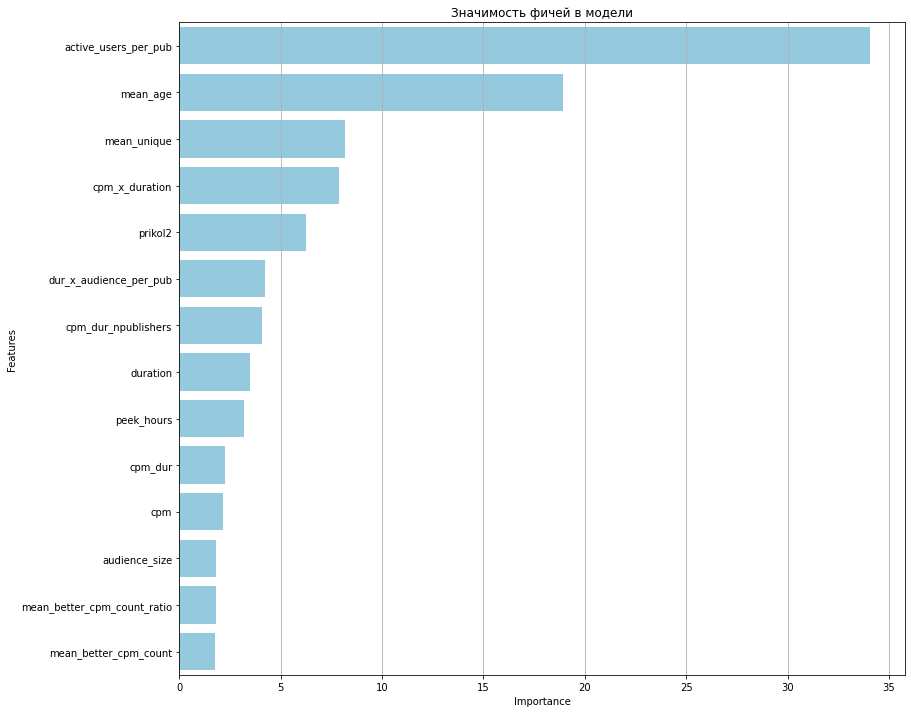

In [189]:
import seaborn as sns
from matplotlib import pyplot as plt

feats = {}
for feature, importance in zip(X_train.columns, classy.feature_importances_):
    feats[feature] = importance
importances = pd.DataFrame.from_dict(feats, orient='index').rename(columns={0: 'Importance'})
importances = importances.sort_values(by='Importance', ascending=False)
importances = importances.reset_index()
importances = importances.rename(columns={'index': 'Features'})
plt.figure(figsize=(13, 12))
plt.grid(True)
sns.barplot(x=importances['Importance'], y=importances['Features'], data=importances, color='skyblue')
plt.title('Значимость фичей в модели')
plt.show()